# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Store the dataset into the Dataframe


In [2]:
df = pd.read_csv("dataset.csv")

### Check the shape of the dataframe


In [3]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
df.info

<bound method DataFrame.info of       business_code cust_number       name_customer           clear_date  \
0              U001  0200769623        WAL-MAR corp  2020-02-11 00:00:00   
1              U001  0200980828              BEN E   2019-08-08 00:00:00   
2              U001  0200792734          MDV/ trust  2019-12-30 00:00:00   
3              CA02  0140105686            SYSC llc                  NaN   
4              U001  0200769623  WAL-MAR foundation  2019-11-25 00:00:00   
...             ...         ...                 ...                  ...   
49995          U001  0200561861      CO corporation                  NaN   
49996          U001  0200769623          WAL-MAR co  2019-09-03 00:00:00   
49997          U001  0200772595    SAFEW associates  2020-03-05 00:00:00   
49998          U001  0200726979           BJ'S  llc  2019-12-12 00:00:00   
49999          U001  0200020431            DEC corp  2019-01-15 00:00:00   

       buisness_year        doc_id posting_date  docume

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe

<bound method NDFrame.describe of       business_code cust_number       name_customer           clear_date  \
0              U001  0200769623        WAL-MAR corp  2020-02-11 00:00:00   
1              U001  0200980828              BEN E   2019-08-08 00:00:00   
2              U001  0200792734          MDV/ trust  2019-12-30 00:00:00   
3              CA02  0140105686            SYSC llc                  NaN   
4              U001  0200769623  WAL-MAR foundation  2019-11-25 00:00:00   
...             ...         ...                 ...                  ...   
49995          U001  0200561861      CO corporation                  NaN   
49996          U001  0200769623          WAL-MAR co  2019-09-03 00:00:00   
49997          U001  0200772595    SAFEW associates  2020-03-05 00:00:00   
49998          U001  0200726979           BJ'S  llc  2019-12-12 00:00:00   
49999          U001  0200020431            DEC corp  2019-01-15 00:00:00   

       buisness_year        doc_id posting_date  docu

# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
df.isnull().mean() * 100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
print(df['baseline_create_date'].corr(df['document_create_date']))
print(df['baseline_create_date'].corr(df['document_create_date.1']))
print(df['document_create_date'].corr(df['document_create_date.1']))
df[['baseline_create_date','document_create_date','document_create_date.1']]

0.9940781398471462
0.9995270204228075
0.994547061660431


,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113
...,...,...,...
49995,20200421.0,20200417,20200421
49996,20190815.0,20190814,20190815
49997,20200219.0,20200218,20200219
49998,20191127.0,20191126,20191127


#### Please check, Column 'posting_id' is constant columns or not


In [11]:
df['posting_id'].nunique()

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [12]:
df['isOpen'].nunique()

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [13]:
df = df.drop(columns = ['document_create_date','posting_id','invoice_id','document type','area_business','document_create_date.1','isOpen'])


### Please check from the dataframe whether all the columns are removed or not 

In [14]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [15]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [16]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [17]:
df = df.drop_duplicates()

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [18]:
print(df.duplicated().sum())
df[df.duplicated()]

0


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms


### Check for the number of Rows and Columns in your dataset

In [19]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [20]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [21]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [22]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [23]:
import datetime
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [24]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [25]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [27]:
df['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [28]:
df['converted_usd'] = np.where(df['invoice_currency'] == 'CAD',df['total_open_amount'] * 0.7, df['total_open_amount'])

### Display the new "converted_usd" column values

In [29]:
df['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [30]:
df.sort_values(['buisness_year'],ascending=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
24693,U001,0200707005,KING S co,2019-03-27,2019.0,1.928933e+09,2019-03-12,2019-03-27,USD,8195.84,2019-03-12,NAA8,8195.840
30055,CA02,0140104440,SO foundation,2019-05-21,2019.0,2.960546e+09,2019-05-03,2019-05-13,CAD,80920.24,2019-05-03,CA10,56644.168
30056,U001,0200750051,ALBER llc,2019-05-20,2019.0,1.929249e+09,2019-05-03,2019-05-18,USD,84027.27,2019-05-03,NAA8,84027.270
30057,U001,CCU013,KRAFT F us,2019-11-01,2019.0,1.929915e+09,2019-09-28,2019-09-28,USD,31739.22,2019-09-28,NAX2,31739.220
30058,U001,0200749225,SUPER associates,2019-01-29,2019.0,1.928618e+09,2019-01-14,2019-01-29,USD,25542.56,2019-01-14,NAA8,25542.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11258,U001,0200772670,ASSOCIAT associates,2020-01-22,2020.0,1.930362e+09,2020-01-06,2020-01-21,USD,60088.90,2020-01-06,NAU5,60088.900
11261,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930662e+09,2020-03-19,2020-04-03,USD,3270.04,2020-03-19,NAH4,3270.040
33206,CA02,0140104440,SO in,NaT,2020.0,2.960624e+09,2020-03-30,2020-04-11,CAD,40288.97,2020-04-01,CA10,28202.279
33217,U001,0200700919,US co,NaT,2020.0,1.930760e+09,2020-04-07,2020-04-22,USD,40497.33,2020-04-07,NAA8,40497.330


### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [31]:
df = df.drop(columns =['invoice_currency','total_open_amount'])

### Write a code to check the number of columns in dataframe

In [32]:
df.columns.shape

(11,)

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [33]:
df.columns[df.isnull().any()]

Index(['clear_date'], dtype='object')

#### Find out the number of null values from the column that you got from the above code

In [34]:
df['clear_date'].isnull().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [35]:
maindata = df.dropna(subset = ['clear_date'])
nulldata = df[df['clear_date'].isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [36]:
maindata.shape

(39158, 11)

In [37]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [38]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [39]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [40]:
maindata['Delay'] = (maindata['clear_date'] - maindata['due_in_date'])

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [41]:
avg_delay = maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)
avg_delay


name_customer
11078 us                 17 days 00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                     2 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us                 6 days 00:00:00
Name: Delay, Length: 3889, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [42]:
maindata['avg_delay'] = maindata['name_customer'].map(avg_delay)
maindata['avg_delay']

0       -3 days +07:08:49.779837776
1                  19 days 00:00:00
2         8 days 02:10:54.545454545
4       -3 days +19:33:27.692307693
5                  71 days 10:40:00
                    ...            
49994             -1 days +14:45:00
49996   -3 days +12:40:08.540925267
49997     1 days 01:08:34.285714285
49998     1 days 13:36:42.985074626
49999   -4 days +02:20:52.173913044
Name: avg_delay, Length: 39158, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [43]:
maindata['avg_delay']=maindata['avg_delay'].dt.total_seconds().astype(int)


### Display the maindata dataframe 

In [44]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-233470
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1641600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,699054
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-188792
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6172800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-33300
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-213591
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,90514
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,135402


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [45]:
maindata = maindata.drop(columns=['Delay','clear_date'])

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [46]:
y = maindata.iloc[:,-1]
y

0        -233470
1        1641600
2         699054
4        -188792
5        6172800
          ...   
49994     -33300
49996    -213591
49997      90514
49998     135402
49999    -337147
Name: avg_delay, Length: 39158, dtype: int32

In [48]:
X = maindata.iloc[:,:-1]
X

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480


#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [49]:
from sklearn.model_selection import train_test_split 
X_train,X_loc_test,y_train,y_loc_test = train_test_split(X, y, test_size=0.4, random_state=0)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [50]:
print(X_train.shape)
print(X_loc_test.shape)
print(y_train.shape)
print(y_loc_test.shape)

(23494, 10)
(15664, 10)
(23494,)
(15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [51]:
X_val,X_test,y_val,y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state=0)

### Please check for the number of rows and columns of all the 4 dataframes 

In [52]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(7832, 10)
(7832, 10)
(7832,)
(7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

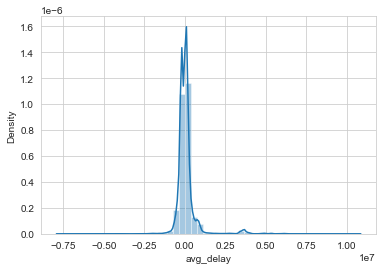

In [53]:
sns.set_style('whitegrid')
#sns.distplot(maindata['avg_delay'], kde = False, color ='red', bins = 100)
sns.distplot(maindata['avg_delay'])
plt.show()

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [54]:
x_train=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
x_train

,name_customer,doc_id
0,17135 associates,1
1,236008 associates,1
2,99 CE associates,2
3,99 CE corporation,2
4,99 CE foundation,2
...,...,...
3097,YAEGER corp,1
3098,YEN BROS,1
3099,YEN BROS co,1
3100,YEN BROS corp,1


### You can make another distribution plot of the "doc_id" column from x_train

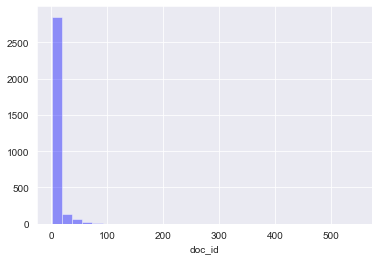

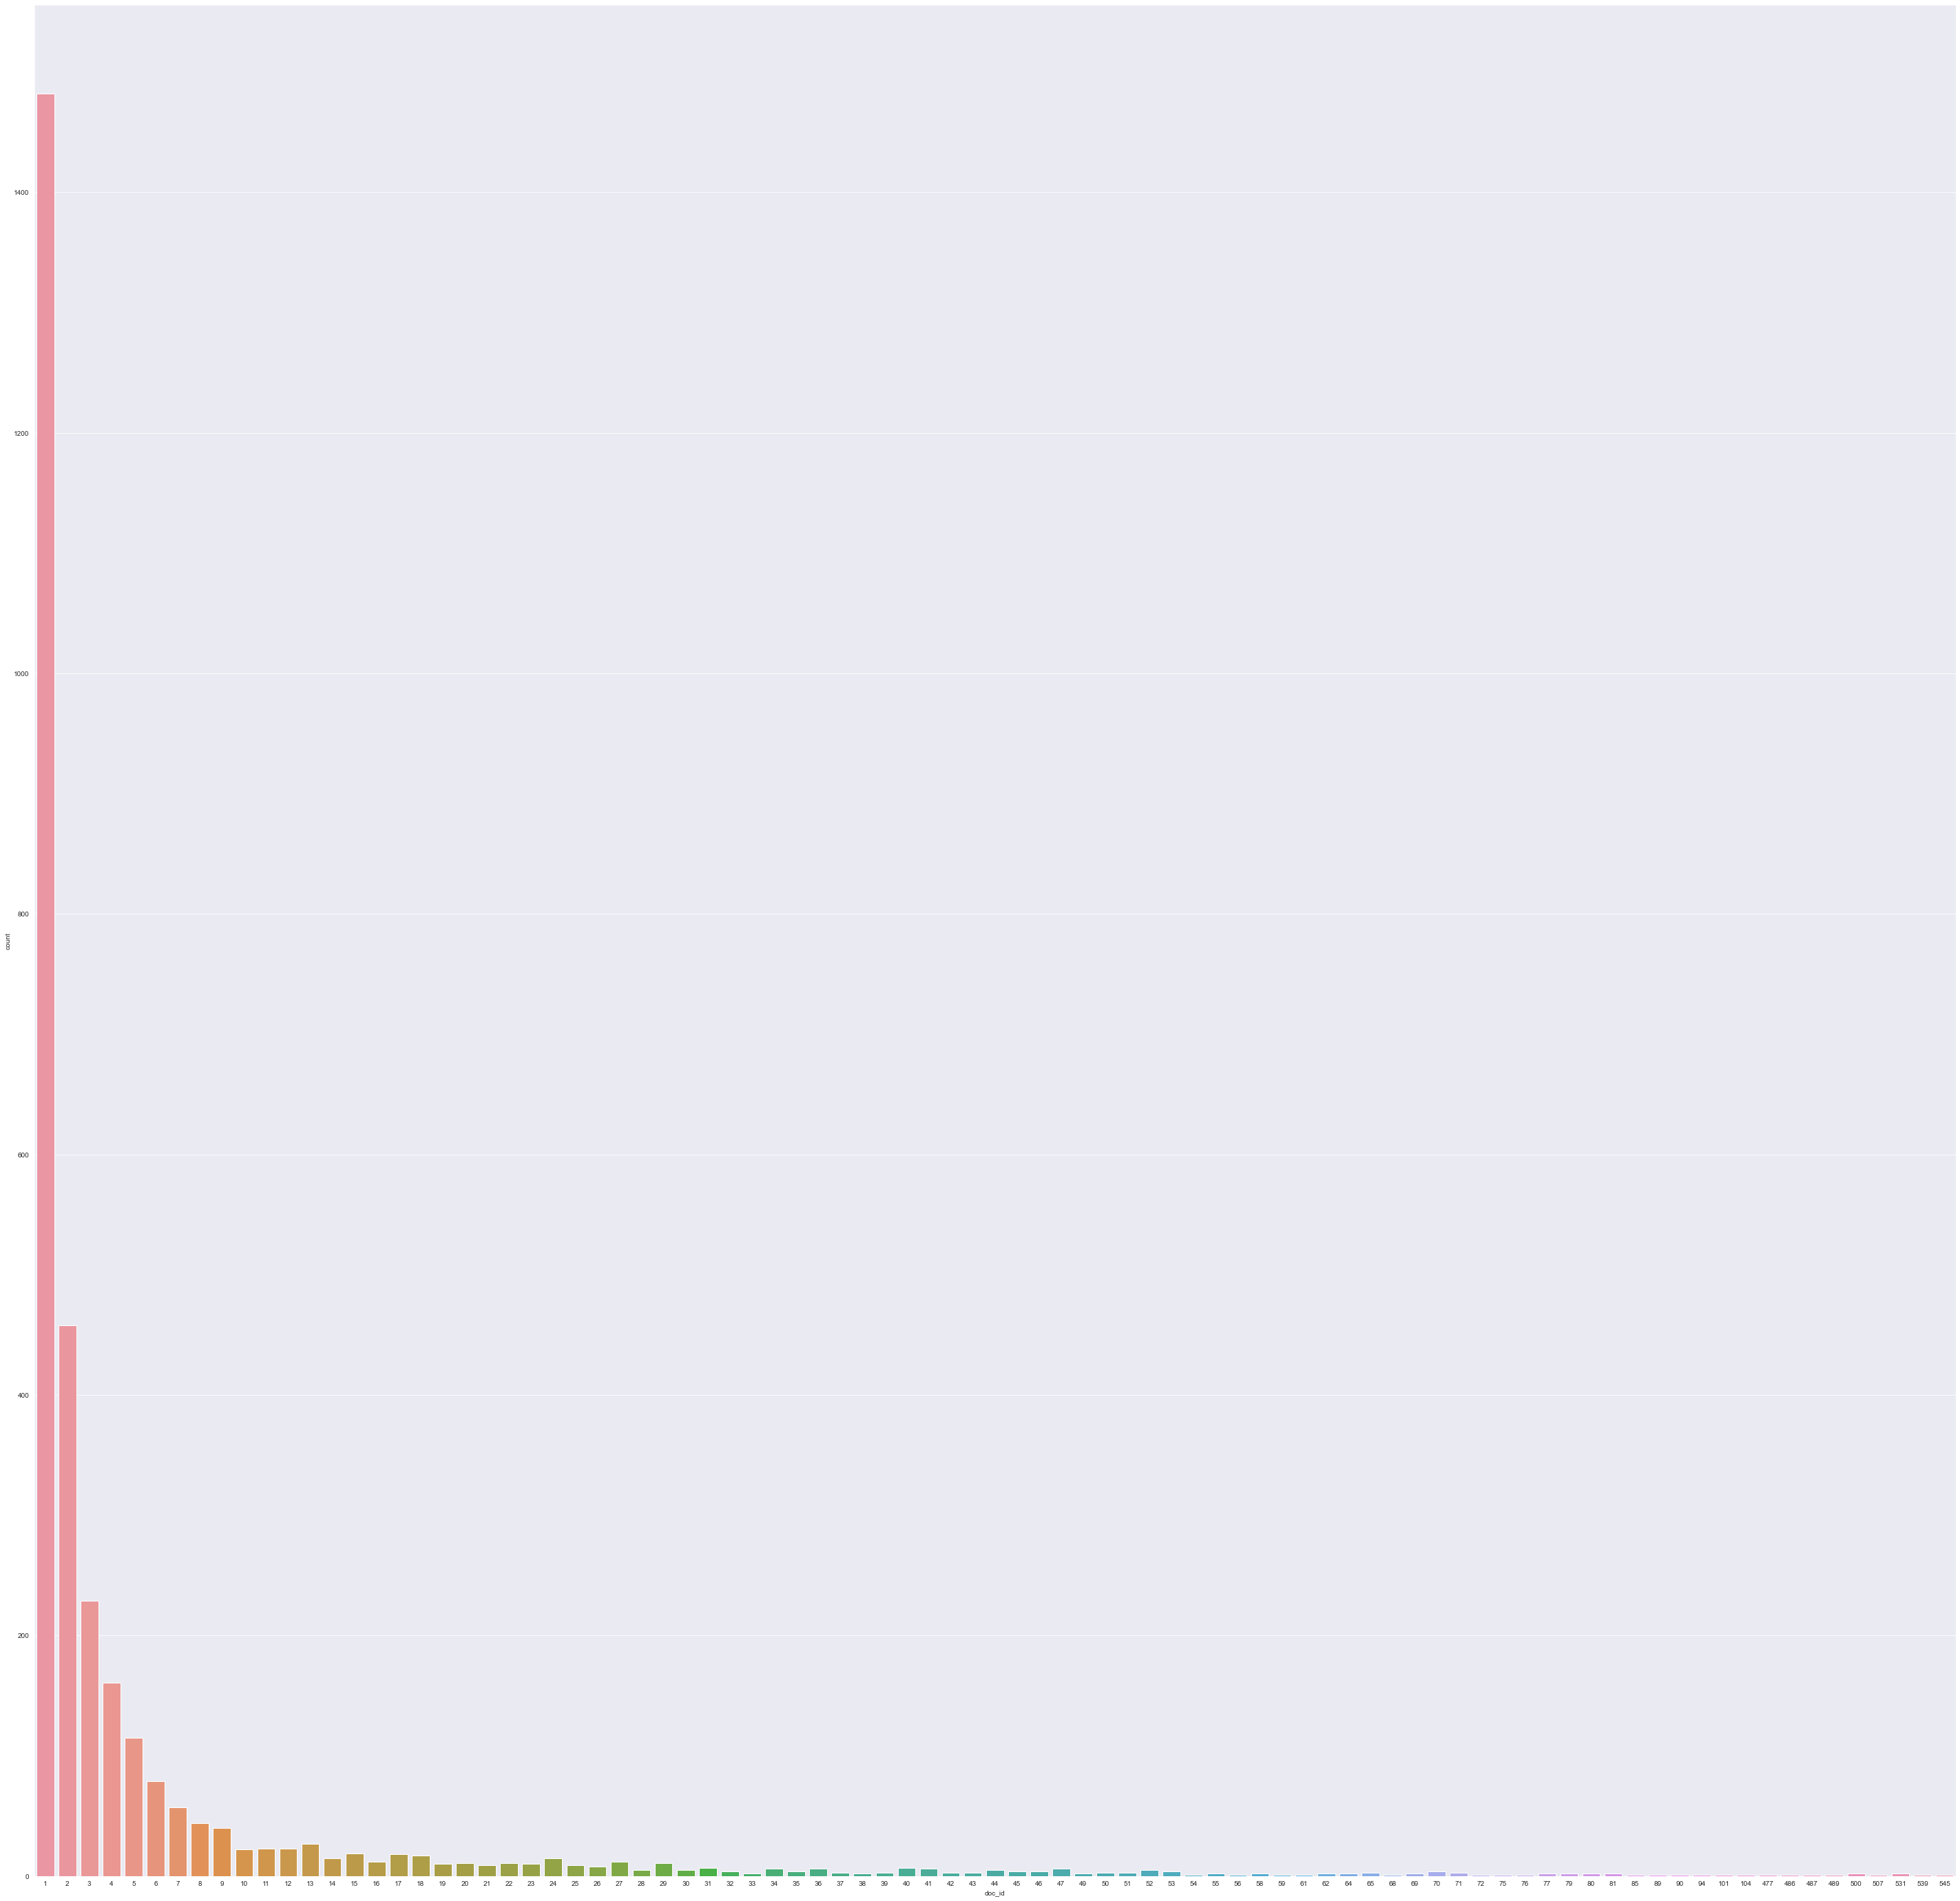

In [55]:
sns.set_style('darkgrid')
sns.distplot(x_train['doc_id'], kde = False, color ='blue', bins = 30)
fig_dims = (50, 50)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='doc_id',ax=ax,data=x_train)
plt.show()

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


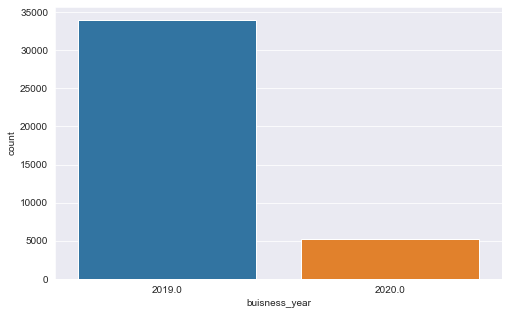

In [56]:
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='buisness_year',ax=ax,data=maindata)
plt.show()

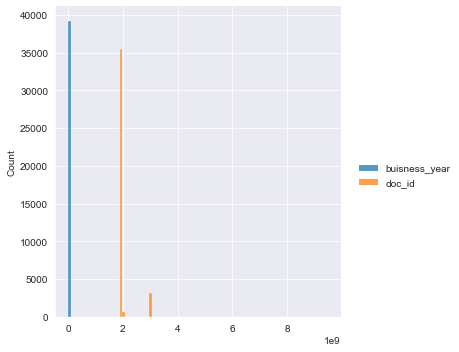

In [57]:
sns.displot(maindata[["buisness_year","doc_id"]])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [58]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
45718,U001,0200794332,COST foundation,2020.0,1.930448e+09,2020-01-28,2020-02-12,2020-01-28,NAAX,36273.03
17966,U001,0200706844,WINC trust,2020.0,1.930517e+09,2020-02-13,2020-02-28,2020-02-13,NAA8,6349.27
21322,U001,0200803720,DEC us,2019.0,1.928590e+09,2019-01-08,2019-01-24,2019-01-01,NAM4,282.84
38919,U001,0200752302,KROGER,2020.0,1.930509e+09,2020-02-12,2020-02-27,2020-02-12,NAA8,64749.18
25191,U001,0200974851,RESTA co,2019.0,1.929483e+09,2019-06-12,2019-06-27,2019-06-12,NAA8,2066.63
...,...,...,...,...,...,...,...,...,...,...
26152,U001,0200769623,WAL-MAR associates,2019.0,1.930152e+09,2019-11-14,2019-11-29,2019-11-14,NAH4,3449.63
40790,U001,0200793568,SUPE in,2019.0,1.930222e+09,2019-12-06,2019-12-21,2019-12-06,NAA8,40591.75
38558,U001,0100036066,GROC associates,2019.0,1.929175e+09,2019-04-22,2019-05-07,2019-04-22,NAA8,24869.32
26776,U001,200769623,WAL-MAR associates,2019.0,1.929555e+09,2019-06-28,2019-07-13,2019-06-28,NAH4,42362.89


In [59]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132247,2.014021e+09,30999.755826
std,0.338766,2.956842e+08,36630.432880
min,2019.000000,1.928502e+09,4.380000
25%,2019.000000,1.929174e+09,4622.179500
50%,2019.000000,1.929731e+09,16919.885000
75%,2019.000000,1.930209e+09,45911.302500
max,2020.000000,9.500000e+09,632134.240000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [60]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [61]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [62]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [63]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
45718,U001,1
17966,U001,1
21322,U001,1
38919,U001,1
25191,U001,1
...,...,...
26152,U001,1
40790,U001,1
38558,U001,1
26776,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [64]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [65]:
X_train , X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [66]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [67]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [68]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [69]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [70]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [71]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [72]:
X_train['cust_number']=X_train['cust_number'].astype(np.int64)
X_train['buisness_year']=X_train['buisness_year'].astype(np.int64)
X_train['name_customer_enc']=X_train['name_customer_enc'].astype(np.int64)
X_train['cust_payment_terms_enc']=X_train['cust_payment_terms_enc'].astype(np.int64)
X_train['business_code_enc']=X_train['business_code_enc'].astype(np.int64)
X_train.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [73]:
X_test['cust_number']=X_test['cust_number'].astype(np.int64)
X_test['buisness_year']=X_test['buisness_year'].astype(np.int64)
X_test['name_customer_enc']=X_test['name_customer_enc'].astype(np.int64)
X_test['cust_payment_terms_enc']=X_test['cust_payment_terms_enc'].astype(np.int64)
X_test['business_code_enc']=X_test['business_code_enc'].astype(np.int64)
X_test.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [74]:
X_val['cust_number']=X_val['cust_number'].astype(np.int64)
X_val['buisness_year']=X_val['buisness_year'].astype(np.int64)
X_val['name_customer_enc']=X_val['name_customer_enc'].astype(np.int64)
X_val['cust_payment_terms_enc']=X_val['cust_payment_terms_enc'].astype(np.int64)
X_val['business_code_enc']=X_val['business_code_enc'].astype(np.int64)
X_val.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [75]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [76]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [77]:
X_train['day_of_baselinecreatedate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baselinecreatedate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baselinecreatedate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baselinecreatedate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baselinecreatedate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baselinecreatedate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baselinecreatedate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baselinecreatedate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baselinecreatedate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [78]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [79]:
X_train['day_of_dueindate'] = X_train['due_in_date'].dt.day
X_train['month_of_dueindate'] = X_train['due_in_date'].dt.month
X_train['year_of_dueindate'] = X_train['due_in_date'].dt.year

X_val['day_of_dueindate'] = X_val['due_in_date'].dt.day
X_val['month_of_dueindate'] = X_val['due_in_date'].dt.month
X_val['year_of_dueindate'] = X_val['due_in_date'].dt.year


X_test['day_of_dueindate'] = X_test['due_in_date'].dt.day
X_test['month_of_dueindate'] = X_test['due_in_date'].dt.month
X_test['year_of_dueindate'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [80]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [81]:
print('X_train datatype')
print(X_train.dtypes)
print('----------------------')
print('X_test datatype')
print(X_test.dtypes)
print('----------------------')
print('X_val datatype')
print(X_val.dtypes)

X_train datatype
cust_number                      int64
buisness_year                    int64
doc_id                         float64
converted_usd                  float64
business_code_enc                int64
name_customer_enc                int64
cust_payment_terms_enc           int64
day_of_postingdate               int64
month_of_postingdate             int64
year_of_postingdate              int64
day_of_baselinecreatedate        int64
month_of_baselinecreatedate      int64
year_of_baselinecreatedate       int64
day_of_dueindate                 int64
month_of_dueindate               int64
year_of_dueindate                int64
dtype: object
----------------------
X_test datatype
cust_number                      int64
buisness_year                    int64
doc_id                         float64
converted_usd                  float64
business_code_enc                int64
name_customer_enc                int64
cust_payment_terms_enc           int64
day_of_postingdate               

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [82]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [83]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [84]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [85]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [86]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['month_of_dueindate',
 'year_of_dueindate',
 'year_of_postingdate',
 'month_of_baselinecreatedate',
 'year_of_baselinecreatedate',
 'day_of_baselinecreatedate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

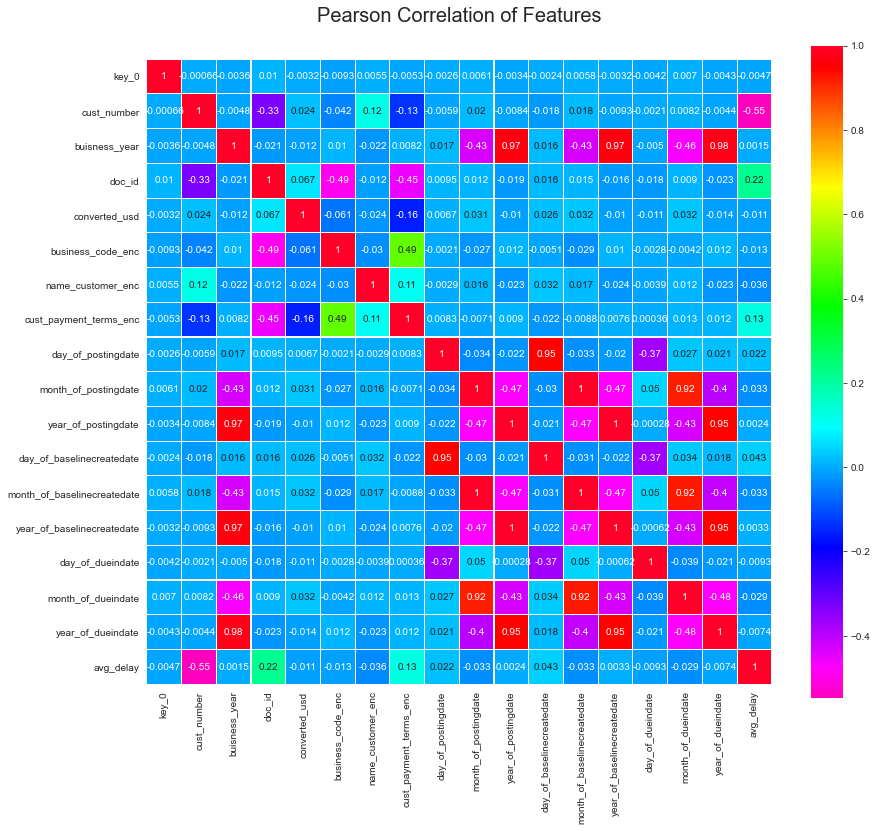

In [87]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [88]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [89]:
sel.variances_

array([1.81954912e+15, 1.14757386e-01, 8.74254278e+16, 1.34173150e+09,
       2.87927752e-01, 1.07015118e+06, 1.35481309e+02, 7.55282009e+01,
       1.22549606e+01, 1.14798749e-01, 7.70243713e+01, 1.22619699e+01,
       1.14937418e-01, 7.66173615e+01, 1.20665594e+01, 1.18125269e-01])

### Important features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [90]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [91]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [92]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [93]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

521973.99951478885

### Display The Comparison Lists

In [94]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[289680065283.12604],[0.31983225235962454],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [95]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegressor')
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
predicted1= supportvector_regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [96]:
MSE_Score.append(mean_squared_error(y_test, predicted1))
R2_Score.append(r2_score(y_test, predicted1))

### Check the same for the Validation set also 

In [97]:
predict_test1= supportvector_regressor.predict(X_val)
mean_squared_error(y_val, predict_test1, squared=False)

631968.0307037181

### Display The Comparison Lists

In [98]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor'],[289680065283.12604, 427979720321.07404],[0.31983225235962454, -0.004894838455766326],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [99]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
decisiontree_regressor = DecisionTreeRegressor()
decisiontree_regressor.fit(X_train, y_train)
predicted2= decisiontree_regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [100]:
MSE_Score.append(mean_squared_error(y_test, predicted2))
R2_Score.append(r2_score(y_test, predicted2))

### Check the same for the Validation set also 

In [101]:
predict_test2= decisiontree_regressor.predict(X_val)
mean_squared_error(y_val, predict_test2, squared=False)

479784.45126583

### Display The Comparison Lists

In [102]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor'],[289680065283.12604, 427979720321.07404, 338667020387.2472],[0.31983225235962454, -0.004894838455766326, 0.20481105860103843],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [103]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predicted3= random_forest.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [104]:
MSE_Score.append(mean_squared_error(y_test, predicted3))
R2_Score.append(r2_score(y_test, predicted3))

### Check the same for the Validation set also 

In [105]:
predict_test3= random_forest.predict(X_val)
mean_squared_error(y_val, predict_test3, squared=False)

327573.9618869123

### Display The Comparison Lists


In [106]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor'],[289680065283.12604, 427979720321.07404, 338667020387.2472, 145043125837.54453],[0.31983225235962454, -0.004894838455766326, 0.20481105860103843, 0.6594392640887435],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [107]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)
predicted4 = xgb_regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [108]:
MSE_Score.append(mean_squared_error(y_test, predicted4))
R2_Score.append(r2_score(y_test, predicted4))

### Check the same for the Validation set also 

In [109]:
predict_test4= xgb_regressor.predict(X_val)
mean_squared_error(y_val, predict_test4, squared=False)

350656.32957032236

### Display The Comparison Lists


In [110]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[289680065283.12604, 427979720321.07404, 338667020387.2472, 145043125837.54453, 153265904639.95752],[0.31983225235962454, -0.004894838455766326, 0.20481105860103843, 0.6594392640887435, 0.6401322091420528],

## You need to make the comparison list into a comparison dataframe 

In [111]:
comparison_list = pd.DataFrame(list(zip(Algorithm,MSE_Score, R2_Score)),columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
comparison_list

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.896801e+11,0.319832
1,SupportVectorRegressor,4.279797e+11,-0.004895
2,DecisionTreeRegressor,3.386670e+11,0.204811
3,RandomForestRegressor,1.450431e+11,0.659439
4,XGB Regressor,1.532659e+11,0.640132


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [112]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [113]:
regges=xgb.XGBRegressor()
random_search=RandomizedSearchCV(regges,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [114]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   54.9s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [115]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
regressorfinal = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=1,monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [117]:
mean_squared_error(y_test,predictedfinal,squared=False)

317256.4852977063

### Calculate the mean Square Error for validation dataset

In [118]:
mean_squared_error(y_val,predict_testfinal,squared=False)

293900.98589134146

### Calculate the R2 score for test

In [119]:
r2_score(y_test, predictedfinal)

0.7636702246334011

### Calculate the R2 score for Validation

In [120]:
r2_score(y_val, predict_testfinal)

0.7826440996108429

### Calculate the Accuracy for train Dataset 

In [119]:
regressorfinal.score(X_train,y_train)

0.9866863264829031

### Calculate the accuracy for validation

In [122]:
regressorfinal.score(X_val,y_val)

0.7826440996108429

### Calculate the accuracy for test

In [123]:
regressorfinal.score(X_test,y_test)

0.7636702246334011

## Specify the reason behind choosing your machine learning model 

- Note : By Choosing XGBoost and HyperTuning it, gives the best accuracy from other models.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [124]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [125]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [127]:
print(nulldata.describe)
print()
print(nulldata.info())

<bound method NDFrame.describe of       business_code cust_number        name_customer clear_date  \
3              CA02  0140105686             SYSC llc        NaT   
7              U001  0200744019              TARG us        NaT   
10             U001  0200418007                  AM         NaT   
14             U001  0200739534           OK systems        NaT   
15             U001  0200353024     DECA corporation        NaT   
...             ...         ...                  ...        ...   
49975          U001  0200769623           WAL-MAR in        NaT   
49980          U001  0200769623  WAL-MAR corporation        NaT   
49982          U001  0200148860             DOLLA co        NaT   
49992          U001  0200900909             SYSCO co        NaT   
49995          U001  0200561861       CO corporation        NaT   

       buisness_year        doc_id posting_date due_in_date  \
3             2020.0  2.960623e+09   2020-03-30  2020-04-10   
7             2020.0  1.930659e+09 

### Storing the Nulldata into a different dataset 
# for BACKUP

In [125]:
nulldata1 = nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [126]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [127]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [128]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_baselinecreatedate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_baselinecreatedate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_baselinecreatedate'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [129]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [130]:
nulldata.dtypes

business_code                          object
cust_number                             int32
name_customer                          object
clear_date                     datetime64[ns]
buisness_year                         float64
doc_id                                float64
posting_date                   datetime64[ns]
due_in_date                    datetime64[ns]
baseline_create_date           datetime64[ns]
cust_payment_terms                     object
converted_usd                         float64
business_code_enc                       int64
day_of_cleardate                      float64
month_of_cleardate                    float64
year_of_cleardate                     float64
day_of_postingdate                      int64
month_of_postingdate                    int64
year_of_postingdate                     int64
day_of_due                              int64
month_of_due                            int64
year_of_due                             int64
day_of_baselinecreatedate         

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [131]:
nulldata = nulldata.drop(columns=['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate'])

### Check the information of the "nulldata" dataframe

In [132]:
nulldata.info

<bound method DataFrame.info of        cust_number  buisness_year        doc_id  converted_usd  \
3        140105686         2020.0  2.960623e+09        2309.79   
7        200744019         2020.0  1.930659e+09       11173.02   
10       200418007         2020.0  1.930611e+09        3525.59   
14       200739534         2020.0  1.930788e+09      121105.65   
15       200353024         2020.0  1.930817e+09        3726.06   
...            ...            ...           ...            ...   
49975    200769623         2020.0  1.930625e+09       13114.99   
49980    200769623         2020.0  1.930851e+09        8899.71   
49982    200148860         2020.0  1.930638e+09        4967.06   
49992    200900909         2020.0  1.930702e+09        1998.64   
49995    200561861         2020.0  1.930797e+09        3187.86   

       business_code_enc  day_of_postingdate  month_of_postingdate  \
3                     66                  30                     3   
7                     66           

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [133]:
print(nulldata.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_number                  9681 non-null   int32  
 1   buisness_year                9681 non-null   float64
 2   doc_id                       9681 non-null   float64
 3   converted_usd                9681 non-null   float64
 4   business_code_enc            9681 non-null   int64  
 5   day_of_postingdate           9681 non-null   int64  
 6   month_of_postingdate         9681 non-null   int64  
 7   year_of_postingdate          9681 non-null   int64  
 8   day_of_due                   9681 non-null   int64  
 9   month_of_due                 9681 non-null   int64  
 10  year_of_due                  9681 non-null   int64  
 11  day_of_baselinecreatedate    9681 non-null   int64  
 12  month_of_baselinecreatedate  9681 non-null   int64  
 13  year_of_baselinec

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [134]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baselinecreatedate', 'month_of_baselinecreatedate',
       'year_of_baselinecreatedate', 'day_of_dueindate', 'month_of_dueindate',
       'year_of_dueindate'],
      dtype='object')

In [135]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_baselinecreatedate', 'month_of_baselinecreatedate',
       'year_of_baselinecreatedate', 'cust_payment_terms_enc',
       'name_customer_enc'],
      dtype='object')

In [136]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baselinecreatedate', 'month_of_baselinecreatedate',
       'year_of_baselinecreatedate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [137]:
nulldata2.dtypes

cust_number                      int32
buisness_year                  float64
doc_id                         float64
converted_usd                  float64
business_code_enc                int64
name_customer_enc                int64
cust_payment_terms_enc           int64
day_of_postingdate               int64
month_of_postingdate             int64
year_of_postingdate              int64
day_of_baselinecreatedate        int64
month_of_baselinecreatedate      int64
year_of_baselinecreatedate       int64
day_of_due                       int64
month_of_due                     int64
year_of_due                      int64
dtype: object

### Now you can pass this dataset into you final model and store it into "final_result"

In [138]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [139]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [140]:
final_result = pd.DataFrame(final_result)
final_result['avg_delay']

0       361470.125000
1       255019.937500
2       -88086.031250
3        92488.640625
4      -491776.562500
            ...      
9676     52543.296875
9677    140607.812500
9678   -894770.937500
9679     93415.726562
9680    -32169.589844
Name: avg_delay, Length: 9681, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [141]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [142]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,361470.125000
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,255019.937500
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,-88086.031250
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,92488.640625
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-491776.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,52543.296875
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,140607.812500
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,-894770.937500
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,93415.726562


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [143]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [144]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [145]:
Final['clear_date'] 

0      2020-04-14 04:24:30.125000000
1      2020-04-05 22:50:19.937500000
2      2020-03-24 23:31:53.968750000
3      2020-05-01 01:41:28.640625000
4      2020-04-20 07:23:43.437500000
                    ...             
9676   2020-03-25 14:35:43.296875000
9677   2020-05-19 15:03:27.812500000
9678   2020-03-15 15:27:09.062500000
9679   2020-04-10 01:56:55.726562500
9680   2020-05-05 15:03:50.410156250
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [146]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [147]:
Final['avg_delay']

0        4.0
1        2.0
2       -2.0
3        1.0
4       -6.0
        ... 
9676     0.0
9677     1.0
9678   -11.0
9679     1.0
9680    -1.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [148]:

bins=[0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [149]:
Final.drop(["key_0","avg_delay"],axis=1, inplace = True) 

### Display the count of each categoty of new "Aging Bucket" column 

In [151]:
Final["Aging Bucket"].value_counts()

0-15               4514
31-45                66
16-30                36
46-60                 7
Greatar than 60       0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [152]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-14 04:24:30.125000000,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-05 22:50:19.937500000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-03-24 23:31:53.968750000,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,NaN
3,U001,0200739534,OK systems,2020-05-01 01:41:28.640625000,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-04-20 07:23:43.437500000,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-25 14:35:43.296875000,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,0-15
9677,U001,0200769623,WAL-MAR corporation,2020-05-19 15:03:27.812500000,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,0-15
9678,U001,0200148860,DOLLA co,2020-03-15 15:27:09.062500000,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,NaN
9679,U001,0200900909,SYSCO co,2020-04-10 01:56:55.726562500,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,0-15


### Store this dataframe into the .csv format

In [ ]:
Final.to_csv('SurajFinal_Payment5.csv', index=False)

# END OF THE PROJECT